In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
flixdf = pd.read_csv('answers_relevant_flix.csv')
flixdf.head(6)

,Časová značka,participant code,age,gender,money freely avaliable every month,used FlixBus before,frequency of FlixBus/comparable platform use,factors consider when deciding,city preferences,compensated CO2 in a real trip,colour red perception,colour green perception,"understanding ""negative""","understanding ""positive""",compensation box colour influenced choices,noticed the compensation caption font changes,the font changes influenced choices,font 1 (Roboto),font 2 (Baskerville)
0,12.1.2020 14:01:47,IB12012020,30,Female,1500 - 2500€,Yes,from time to time,"money, time","Vienna, Bratislava, Budapest, Prague",Not sure,2,4,alerting/warning,tranquil/calm,Yes,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...
1,3.2.2020 15:07:29,SC-03-02-20,24,Male,under 500€,No,never,"time, distance","Vienna, Ljubljana, Budapest, Prague, Salzburg",I haven't used FlixBus,4,4,sad/anxious,happy/lively,No,Yes,No,I mostly like it.,I mostly like it.
2,10.2.2020 17:10:40,DM-10-02-2020,25,Male,under 500€,Yes,from time to time,"money, time, distance, the particular destinat...",Ljubljana,Yes,2,4,"alerting/warning, aggressive/threatening","tranquil/calm, rewarding, happy/lively, beauti...",Not sure,No,I have not noticed,I mostly like it.,I mostly like it.
3,27.2.2020 15:19:04,DW27022020,22,Female,under 500€,Yes,from time to time,"money, time, distance, eco-friendliness, the p...","Vienna, Nuremberg, Prague",Ryanair,2,3,aggressive/threatening,beautiful,Not sure,No,I have not noticed,I mostly dislike it.,I mostly like it.
4,28.2.2020 16:19:57,CK-28-02-2020,24,Female,under 500€,Yes,from time to time,"money, time, distance, the particular destinat...",NaN,No,2,5,"alerting/warning, aggressive/threatening","rewarding, happy/lively",Not sure,No,I have not noticed,I mostly dislike it.,I mostly dislike it.
5,28.2.2020 20:49:48,JA-28-02-2020,26,Female,under 500€,RegioJet,from time to time,"money, time, the particular destination cities","Vienna, Ljubljana, Budapest, Nuremberg, Salzburg",RegioJet,2,5,alerting/warning,"tranquil/calm, happy/lively",Yes,No,I have not noticed,"I mostly like it., I think it fitted well to t...",I mostly dislike it.


In [191]:
flixdf = flixdf.drop(columns=['Časová značka'])

In [192]:
flixdf['city preferences'].value_counts()
#we need to make such things separate

Vienna, Nuremberg, Prague                           1
Vienna, Bratislava, Budapest, Prague                1
Ljubljana                                           1
Vienna, Ljubljana, Budapest, Prague, Salzburg       1
Vienna, Ljubljana, Budapest, Nuremberg, Salzburg    1
Name: city preferences, dtype: int64

In [193]:
# creating new df with columns for factors
decisive_factors = flixdf["factors consider when deciding"]= flixdf["factors consider when deciding"].str.split(", ", n = -1, expand = True)
decisive_factors

,0,1,2,3,4
0,money,time,None,None,None
1,time,distance,None,None,None
2,money,time,distance,the particular destination cities,None
3,money,time,distance,eco-friendliness,the particular destination cities
4,money,time,distance,the particular destination cities,the particular start cities
5,money,time,the particular destination cities,None,None


In [194]:
flixdf_f1 = pd.concat([flixdf, decisive_factors], axis=1)
flixdf_f1.head()
#now we have the decisive facs as columns, wanna make rows though

,participant code,age,gender,money freely avaliable every month,used FlixBus before,frequency of FlixBus/comparable platform use,factors consider when deciding,city preferences,compensated CO2 in a real trip,colour red perception,...,compensation box colour influenced choices,noticed the compensation caption font changes,the font changes influenced choices,font 1 (Roboto),font 2 (Baskerville),0,1,2,3,4
0,IB12012020,30,Female,1500 - 2500€,Yes,from time to time,money,"Vienna, Bratislava, Budapest, Prague",Not sure,2,...,Yes,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...,money,time,None,None,None
1,SC-03-02-20,24,Male,under 500€,No,never,time,"Vienna, Ljubljana, Budapest, Prague, Salzburg",I haven't used FlixBus,4,...,No,Yes,No,I mostly like it.,I mostly like it.,time,distance,None,None,None
2,DM-10-02-2020,25,Male,under 500€,Yes,from time to time,money,Ljubljana,Yes,2,...,Not sure,No,I have not noticed,I mostly like it.,I mostly like it.,money,time,distance,the particular destination cities,None
3,DW27022020,22,Female,under 500€,Yes,from time to time,money,"Vienna, Nuremberg, Prague",Ryanair,2,...,Not sure,No,I have not noticed,I mostly dislike it.,I mostly like it.,money,time,distance,eco-friendliness,the particular destination cities
4,CK-28-02-2020,24,Female,under 500€,Yes,from time to time,money,NaN,No,2,...,Not sure,No,I have not noticed,I mostly dislike it.,I mostly dislike it.,money,time,distance,the particular destination cities,the particular start cities


In [195]:
melted_factors1 = pd.melt(flixdf_f1, id_vars = ['participant code','age','gender','money freely avaliable every month','used FlixBus before','frequency of FlixBus/comparable platform use','factors consider when deciding','city preferences','compensated CO2 in a real trip','colour red perception','colour green perception','understanding "negative" ','understanding "positive"','compensation box colour  influenced choices','noticed the compensation caption font changes','the font changes influenced choices','font 1 (Roboto)','font 2 (Baskerville)' ],   value_name = "Factor considered")
#and this claims two columns don't exist???? I cannot do anything about it whatever I do.
#other manipulations with those two also blocked
#aha, it was a problem of some hidden characters in the name (hidden spaces), now works
melted_factors1

,participant code,age,gender,money freely avaliable every month,used FlixBus before,frequency of FlixBus/comparable platform use,factors consider when deciding,city preferences,compensated CO2 in a real trip,colour red perception,colour green perception,"understanding ""negative""","understanding ""positive""",compensation box colour influenced choices,noticed the compensation caption font changes,the font changes influenced choices,font 1 (Roboto),font 2 (Baskerville),variable,Factor considered
0,IB12012020,30,Female,1500 - 2500€,Yes,from time to time,money,"Vienna, Bratislava, Budapest, Prague",Not sure,2,4,alerting/warning,tranquil/calm,Yes,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...,0,money
1,SC-03-02-20,24,Male,under 500€,No,never,time,"Vienna, Ljubljana, Budapest, Prague, Salzburg",I haven't used FlixBus,4,4,sad/anxious,happy/lively,No,Yes,No,I mostly like it.,I mostly like it.,0,time
2,DM-10-02-2020,25,Male,under 500€,Yes,from time to time,money,Ljubljana,Yes,2,4,"alerting/warning, aggressive/threatening","tranquil/calm, rewarding, happy/lively, beauti...",Not sure,No,I have not noticed,I mostly like it.,I mostly like it.,0,money
3,DW27022020,22,Female,under 500€,Yes,from time to time,money,"Vienna, Nuremberg, Prague",Ryanair,2,3,aggressive/threatening,beautiful,Not sure,No,I have not noticed,I mostly dislike it.,I mostly like it.,0,money
4,CK-28-02-2020,24,Female,under 500€,Yes,from time to time,money,NaN,No,2,5,"alerting/warning, aggressive/threatening","rewarding, happy/lively",Not sure,No,I have not noticed,I mostly dislike it.,I mostly dislike it.,0,money
5,JA-28-02-2020,26,Female,under 500€,RegioJet,from time to time,money,"Vienna, Ljubljana, Budapest, Nuremberg, Salzburg",RegioJet,2,5,alerting/warning,"tranquil/calm, happy/lively",Yes,No,I have not noticed,"I mostly like it., I think it fitted well to t...",I mostly dislike it.,0,money
6,IB12012020,30,Female,1500 - 2500€,Yes,from time to time,money,"Vienna, Bratislava, Budapest, Prague",Not sure,2,4,alerting/warning,tranquil/calm,Yes,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...,1,time
7,SC-03-02-20,24,Male,under 500€,No,never,time,"Vienna, Ljubljana, Budapest, Prague, Salzburg",I haven't used FlixBus,4,4,sad/anxious,happy/lively,No,Yes,No,I mostly like it.,I mostly like it.,1,distance
8,DM-10-02-2020,25,Male,under 500€,Yes,from time to time,money,Ljubljana,Yes,2,4,"alerting/warning, aggressive/threatening","tranquil/calm, rewarding, happy/lively, beauti...",Not sure,No,I have not noticed,I mostly like it.,I mostly like it.,1,time
9,DW27022020,22,Female,under 500€,Yes,from time to time,money,"Vienna, Nuremberg, Prague",Ryanair,2,3,aggressive/threatening,beautiful,Not sure,No,I have not noticed,I mostly dislike it.,I mostly like it.,1,time


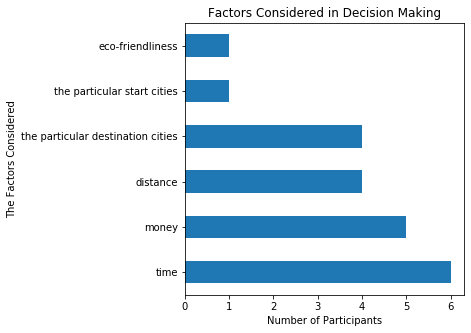

In [196]:
#melted_factors1['Factor considered'].value_counts().plot(kind="bar")
#why do we have time 2 times?
melted_factors1['Factor considered'].value_counts().plot(kind='barh', figsize=(5, 5))
plt.xlabel("Number of Participants")
plt.ylabel("The Factors Considered")
plt.title("Factors Considered in Decision Making", y=1)
plt.xticks(np.arange(0,7,1));
plt.savefig('Factors_consiedered.png')

In [197]:
melted_factors1['Factor considered'].value_counts()

time                                 6
money                                5
distance                             4
the particular destination cities    4
the particular start cities          1
eco-friendliness                     1
Name: Factor considered, dtype: int64

In [198]:
cities_considered = flixdf["city preferences"].str.split(", ", n = -1, expand = True)
cities_considered


,0,1,2,3,4
0,Vienna,Bratislava,Budapest,Prague,None
1,Vienna,Ljubljana,Budapest,Prague,Salzburg
2,Ljubljana,None,None,None,None
3,Vienna,Nuremberg,Prague,None,None
4,NaN,NaN,NaN,NaN,NaN
5,Vienna,Ljubljana,Budapest,Nuremberg,Salzburg


In [199]:
flixdf_f2 = pd.concat([flixdf, cities_considered], axis=1)

In [200]:
melted_factors2 = pd.melt(flixdf_f2, id_vars = ['participant code','age','gender','money freely avaliable every month','used FlixBus before','frequency of FlixBus/comparable platform use','factors consider when deciding','city preferences','compensated CO2 in a real trip','colour red perception','colour green perception','understanding "negative" ','understanding "positive"','compensation box colour  influenced choices','noticed the compensation caption font changes','the font changes influenced choices','font 1 (Roboto)','font 2 (Baskerville)' ],   value_name = "Cities considered")
#and this claims two columns don't exist???? I cannot do anything about it whatever I do.
#other manipulations with those two also blocked
melted_factors2

,participant code,age,gender,money freely avaliable every month,used FlixBus before,frequency of FlixBus/comparable platform use,factors consider when deciding,city preferences,compensated CO2 in a real trip,colour red perception,colour green perception,"understanding ""negative""","understanding ""positive""",compensation box colour influenced choices,noticed the compensation caption font changes,the font changes influenced choices,font 1 (Roboto),font 2 (Baskerville),variable,Cities considered
0,IB12012020,30,Female,1500 - 2500€,Yes,from time to time,money,"Vienna, Bratislava, Budapest, Prague",Not sure,2,4,alerting/warning,tranquil/calm,Yes,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...,0,Vienna
1,SC-03-02-20,24,Male,under 500€,No,never,time,"Vienna, Ljubljana, Budapest, Prague, Salzburg",I haven't used FlixBus,4,4,sad/anxious,happy/lively,No,Yes,No,I mostly like it.,I mostly like it.,0,Vienna
2,DM-10-02-2020,25,Male,under 500€,Yes,from time to time,money,Ljubljana,Yes,2,4,"alerting/warning, aggressive/threatening","tranquil/calm, rewarding, happy/lively, beauti...",Not sure,No,I have not noticed,I mostly like it.,I mostly like it.,0,Ljubljana
3,DW27022020,22,Female,under 500€,Yes,from time to time,money,"Vienna, Nuremberg, Prague",Ryanair,2,3,aggressive/threatening,beautiful,Not sure,No,I have not noticed,I mostly dislike it.,I mostly like it.,0,Vienna
4,CK-28-02-2020,24,Female,under 500€,Yes,from time to time,money,NaN,No,2,5,"alerting/warning, aggressive/threatening","rewarding, happy/lively",Not sure,No,I have not noticed,I mostly dislike it.,I mostly dislike it.,0,NaN
5,JA-28-02-2020,26,Female,under 500€,RegioJet,from time to time,money,"Vienna, Ljubljana, Budapest, Nuremberg, Salzburg",RegioJet,2,5,alerting/warning,"tranquil/calm, happy/lively",Yes,No,I have not noticed,"I mostly like it., I think it fitted well to t...",I mostly dislike it.,0,Vienna
6,IB12012020,30,Female,1500 - 2500€,Yes,from time to time,money,"Vienna, Bratislava, Budapest, Prague",Not sure,2,4,alerting/warning,tranquil/calm,Yes,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...,1,Bratislava
7,SC-03-02-20,24,Male,under 500€,No,never,time,"Vienna, Ljubljana, Budapest, Prague, Salzburg",I haven't used FlixBus,4,4,sad/anxious,happy/lively,No,Yes,No,I mostly like it.,I mostly like it.,1,Ljubljana
8,DM-10-02-2020,25,Male,under 500€,Yes,from time to time,money,Ljubljana,Yes,2,4,"alerting/warning, aggressive/threatening","tranquil/calm, rewarding, happy/lively, beauti...",Not sure,No,I have not noticed,I mostly like it.,I mostly like it.,1,None
9,DW27022020,22,Female,under 500€,Yes,from time to time,money,"Vienna, Nuremberg, Prague",Ryanair,2,3,aggressive/threatening,beautiful,Not sure,No,I have not noticed,I mostly dislike it.,I mostly like it.,1,Nuremberg


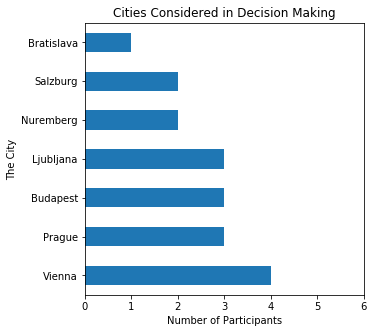

In [201]:
melted_factors2['Cities considered'].value_counts().plot(kind='barh', figsize=(5, 5))
plt.xlabel("Number of Participants",)
plt.ylabel("The City")
plt.title("Cities Considered in Decision Making", y=1)
plt.xticks(np.arange(0,7,1));
plt.savefig('Cities.png')

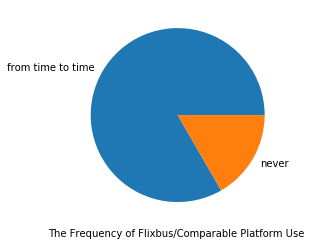

In [202]:
flixdf['frequency of FlixBus/comparable platform use'].value_counts().plot(kind="pie")
plt.xlabel("The Frequency of Flixbus/Comparable Platform Use ",)
plt.ylabel(" ")
plt.savefig('Frequency of use.png')


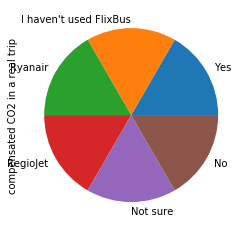

In [203]:
flixdf['compensated CO2 in a real trip'].value_counts().plot(kind="pie")


Text(0, 0.5, ' ')

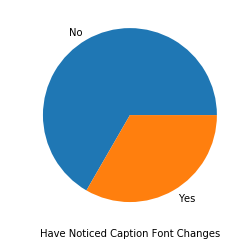

In [204]:
flixdf['noticed the compensation caption font changes'].value_counts().plot(kind="pie")
plt.xlabel("Have Noticed Caption Font Changes",)
plt.ylabel(" ")

In [205]:
use_vs_compens = flixdf.iloc[:,[5,6,9]]
use_vs_compens

,frequency of FlixBus/comparable platform use,factors consider when deciding,colour red perception
0,from time to time,money,2
1,never,time,4
2,from time to time,money,2
3,from time to time,money,2
4,from time to time,money,2
5,from time to time,money,2


In [206]:
grouped_use = use_vs_compens.groupby('compensated CO2 in a real trip').agg('sum')
grouped_use 

KeyError: 'compensated CO2 in a real trip'

In [207]:
colors = flixdf.iloc[:,[9,10,13]]
colors

,colour red perception,colour green perception,compensation box colour influenced choices
0,2,4,Yes
1,4,4,No
2,2,4,Not sure
3,2,3,Not sure
4,2,5,Not sure
5,2,5,Yes


In [208]:
colors = colors.drop([3,4,5])
colors

,colour red perception,colour green perception,compensation box colour influenced choices
0,2,4,Yes
1,4,4,No
2,2,4,Not sure


In [209]:
grouped_color = colors.groupby('compensation box colour  influenced choices').agg('sum')
grouped_color # makes no sense

,colour red perception,colour green perception
compensation box colour influenced choices,,
No,4,4
Not sure,2,4
Yes,2,4


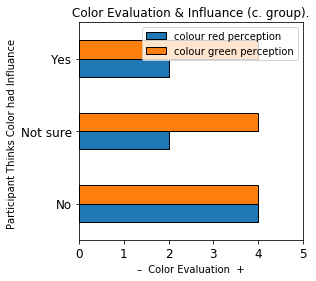

In [210]:
grouped_color[:].sort_index(ascending=True).plot(
    kind='barh',
    figsize=(4, 4),
    edgecolor='black',
    fontsize=12,
    title='Color Evaluation & Influance (c. group).'
).yaxis.label.set_visible(True)

plt.xlabel("–  Color Evaluation  +")
plt.ylabel("Participant Thinks Color had Influance ")
plt.xticks(np.arange(0,6,1));
plt.savefig('Color_evalu.png')


In [211]:
fonts = flixdf.iloc[:,[-4,-3,-2,-1]]
fonts

,noticed the compensation caption font changes,the font changes influenced choices,font 1 (Roboto),font 2 (Baskerville)
0,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...
1,Yes,No,I mostly like it.,I mostly like it.
2,No,I have not noticed,I mostly like it.,I mostly like it.
3,No,I have not noticed,I mostly dislike it.,I mostly like it.
4,No,I have not noticed,I mostly dislike it.,I mostly dislike it.
5,No,I have not noticed,"I mostly like it., I think it fitted well to t...",I mostly dislike it.


In [212]:
fonts_comp = fonts.groupby("noticed the compensation caption font changes").sum()

In [213]:
fonts_comp

,the font changes influenced choices,font 1 (Roboto),font 2 (Baskerville)
noticed the compensation caption font changes,,,
No,I have not noticedI have not noticedI have not...,I mostly like it.I mostly dislike it.I mostly ...,I mostly like it.I mostly like it.I mostly dis...
Yes,YesNo,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...


In [214]:
font1 = fonts["font 1 (Roboto)"].str.split(", ", n = -1, expand = True)
fonts2 = pd.concat([fonts, font1], axis=1)
fonts2 = fonts2.drop(columns=["font 1 (Roboto)"])
fonts2.head(7)

,noticed the compensation caption font changes,the font changes influenced choices,font 2 (Baskerville),0,1
0,Yes,Yes,I think it did not fit well to the place it wa...,I think it did not fit well to the place it wa...,None
1,Yes,No,I mostly like it.,I mostly like it.,None
2,No,I have not noticed,I mostly like it.,I mostly like it.,None
3,No,I have not noticed,I mostly like it.,I mostly dislike it.,None
4,No,I have not noticed,I mostly dislike it.,I mostly dislike it.,None
5,No,I have not noticed,I mostly dislike it.,I mostly like it.,I think it fitted well to the place it was use...


In [215]:
melted_fonts = pd.melt(fonts2, id_vars = ['noticed the compensation caption font changes','the font changes influenced choices','font 2 (Baskerville)' ],   value_name = "Font1 (Roboto)")

melted_fonts

,noticed the compensation caption font changes,the font changes influenced choices,font 2 (Baskerville),variable,Font1 (Roboto)
0,Yes,Yes,I think it did not fit well to the place it wa...,0,I think it did not fit well to the place it wa...
1,Yes,No,I mostly like it.,0,I mostly like it.
2,No,I have not noticed,I mostly like it.,0,I mostly like it.
3,No,I have not noticed,I mostly like it.,0,I mostly dislike it.
4,No,I have not noticed,I mostly dislike it.,0,I mostly dislike it.
5,No,I have not noticed,I mostly dislike it.,0,I mostly like it.
6,Yes,Yes,I think it did not fit well to the place it wa...,1,None
7,Yes,No,I mostly like it.,1,None
8,No,I have not noticed,I mostly like it.,1,None
9,No,I have not noticed,I mostly like it.,1,None


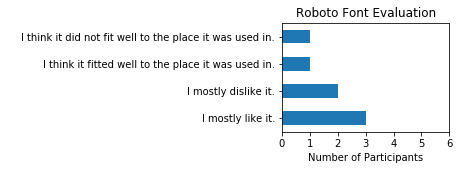

In [218]:
melted_fonts['Font1 (Roboto)'].value_counts().plot(kind='barh', figsize=(3, 2))
plt.xlabel("Number of Participants")
plt.ylabel(" ")
plt.title("Roboto Font Evaluation", y=1)
plt.xticks(np.arange(0,7,1));
plt.savefig('Font2_evalu.png')

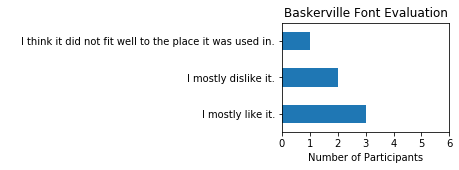

In [219]:
fonts['font 2 (Baskerville)'].value_counts().plot(kind='barh', figsize=(3, 2))
plt.xlabel("Number of Participants")
plt.ylabel(" ")
plt.title("Baskerville Font Evaluation", y=1)
plt.xticks(np.arange(0,7,1));
plt.savefig('Font2_evalu.png')

In [104]:
print(colors.columns.tolist())

['colour red perception', 'colour green perception', 'compensation box colour  influenced choices']


In [114]:
print(flixdf.columns.tolist())

['Časová značka', 'participant code', 'age', 'gender', 'money freely avaliable every month', 'used FlixBus before', 'frequency of FlixBus/comparable platform use', 'factors consider when deciding', 'city preferences', 'compensated CO2 in a real trip', 'colour red perception', 'colour green perception', 'understanding "negative" ', 'understanding "positive"', 'compensation box colour  influenced choices', 'noticed the compensation caption font changes', 'the font changes influenced choices', 'font 1 (Roboto)', 'font 2 (Baskerville)']
